In [2]:
import numpy as np
import matplotlib.pyplot as plt

The following cell illustrates the following. Try rolling a fair die 4 times in a row. What are the chances of landing a 6 at least once?

This is:

$$1-(5/6)^4 = 0.5177 $$

Which means... The chance of <b> not </b> rolling a 6, which is 5/6 each time (4 times), and subtracting from 1.

In [3]:
counter = 0
#m is the number of iterations
m = 10000
for count in range(m):
    array = np.random.randint(1,7,size=4)
#     print(array)
    # do we get a 6 in 4 dice rolls?
    if sum((array == 6)*1) >=1:
        counter+=1

counter/m

0.5075

The second De Mere program simulates a pair of sixes will occur in <i> n</i> rolls of the dice

The probability of <b> not </b> rolling a pair of sixes is 35/36. Thus if we are gambling and want our odds better than 50%, we would play if the minimum n that satisfies:

$$ 1-(35/36)^n >= 0.50 $$

Luckily, we can solve this:

$$0.50 = (35/36)^n $$

$$ln(0.5) = n*ln(35/36)$$

$$n = ln(0.5)/ln(35/36) ~ = 24.605$$

So you would play if the number of rolls was 25 or greater.

Let's see this in some code:

In [4]:
#n= number of rolls
n = np.arange(1,101)
# m is the number of trials for a particular roll
count_list = []
for rolls in n:

#     the line below simulates rolling a pair of dice n times
    die1 = np.random.randint(1,7,size=rolls)
    die2 = np.random.randint(1,7,size=rolls)
    sumdice= die1+die2

    count_list.append(sum((sumdice == 12)*1))

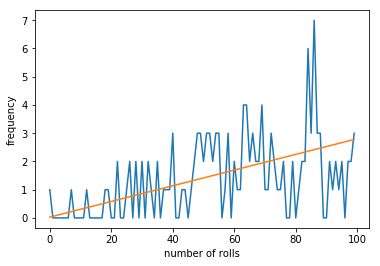

In [5]:
plt.plot(count_list)
plt.plot(n/36)
plt.ylabel('frequency')
plt.xlabel('number of rolls')
plt.show()


Now let's redo this with multiple trials per roll:

In [16]:
#n= number of rolls

n = np.arange(1,51)
# m is the number of trials for a particular roll
m = 100000
count_list = []
for rolls in n:
    # print every 5 rolls
    if (rolls+1) % 5 == 1:
        print(rolls)
    counter = 0
    for trials in range(m):

        # the line below simulates rolling a pair of dice n times
        die1 = np.random.randint(1,7,size=rolls)
        die2 = np.random.randint(1,7,size=rolls)
        sumdice= die1+die2
#         if there is a 12 in the array, then we add it to the counter
        if sum((sumdice == 12)*1)>=1:
            counter+=1
    # At the end of all the trials for a particular n, we then calculate the probability and add this to our list
    count_list.append(counter/m)

5


10


15


20


25


30


35


40


45


50


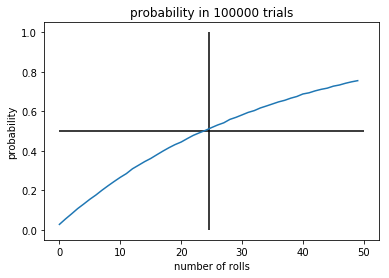

In [17]:
plt.plot(count_list)
plt.vlines(x=24.6, ymin=0, ymax=1)
plt.hlines(y=0.5, xmin=0, xmax=n.max())
plt.title('probability in '+str(m)+' trials')
plt.ylabel('probability')
plt.xlabel('number of rolls')
plt.show()


In [18]:
print(count_list[23])  # element 24
print(count_list[24])  #element 25

0.49138
0.50374
